In [1]:
# header files
import glob
import csv
import numpy as np
import pandas as pd
from sksurv.nonparametric import kaplan_meier_estimator
from sksurv.linear_model import CoxnetSurvivalAnalysis
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import (
    concordance_index_censored,
    concordance_index_ipcw,
    cumulative_dynamic_auc,
    integrated_brier_score,
)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression, f_classif
from datetime import datetime
plt.figure(figsize=(10,10))
print("Header files loaded!")

Header files loaded!


<Figure size 720x720 with 0 Axes>

In [2]:
# hyper-parameters
is_ovarian_cancer = 1
is_cervix_cancer = 0
is_endometrial_cancer = 0

In [3]:
# load ovarian cancer files
if is_ovarian_cancer:
    oc_files = (glob.glob("../results/oc_collagen_features/window_1/*"))
    print(len(oc_files))

95


In [4]:
# collect features
if is_ovarian_cancer:
    collagen_features = []
    for file in oc_files:
        filename = file.split("/")[-1]
        flag = -1
        file_features = []
        with open(file, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)-1):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/window_2/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)-1):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/window_3/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)-1):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/window_4/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)-1):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/window_5/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)-1):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/window_6/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)-1):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/window_7/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)-1):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/window_8/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)-1):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/window_9/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)-1):
                        file_features.append(float(array[index]))
        collagen_features.append(file_features)

In [5]:
# create output survival information for training model and get til features
if is_ovarian_cancer:
    til_features = []
    censor = []
    days = []
    filenames = []
    flag = -1
    with open("../results/DATA_OC.csv", newline='', encoding = "ISO-8859-1") as csvfile:
        spamreader = csv.reader(csvfile)
        for row in spamreader:
            if flag == -1:
                flag = 1
                print(row)
            else:
                array = row
                filenames.append(array[0])
                f_features = [float(array[1]), float(array[2]), float(array[3]), float(array[4]), float(array[5]), float(array[6]), float(array[7])]
                til_features.append(f_features)
                censor.append(bool(int(array[20])))
                days.append(int(array[23]))
                
    final_til_features = []
    y = []
    event = []
    survival_time = []
    for file in oc_files:
        count = 0
        filename1 = file.split("/")[-1][:-4]
        for filename in filenames:
            filename2 = filename
            if filename1 == filename2:
                final_til_features.append(til_features[count])
                y.append([censor[count], days[count]])
                event.append(censor[count])
                survival_time.append(days[count])
            count += 1
    print(len(final_til_features))
    print(len(y))
    print(len(event))
    print(len(survival_time))

['patient_name', 'SF1', 'SF2', 'SF3', 'SF4', 'SF5', 'SF6', 'SF7', 'cont_risk_score', 'binary_risk_score', 'WSI_Width', 'WSI_Height', 'year_of_birth', 'race', 'year_of_death', 'vital_status', 'Organ', 'treatment_type', 'Age', 'TTE', 'censor', 'Site', 'stage', 'OS_days', 'Vital', 'stage_numeric']
95
95
95
95


In [6]:
# generate training set for training model
features = []
for index in range(0, len(oc_files)):
    #features.append(final_til_features[index]+collagen_features[index])
    features.append(collagen_features[index])
    #features.append(final_til_features[index])
print(len(features))
print(len(features[0]))

95
27


In [7]:
# final training information to be used for training model
features = np.array(features)
y = np.array(y)
event = np.array(event)
survival_time = np.array(survival_time)

In [ ]:
# main code for training
iter_scores = []
max_score = -1
dt = dtype=[('Status', '?'), ('Survival_in_days', '<f8')]
for iter in range(100):
    model_score = []
    kf = KFold(n_splits=10, shuffle=True)
    for train_index, test_index in kf.split(features):
        # get the training and validation data
        features_train, features_test = features[train_index], features[test_index]
        y_train, y_test = y[train_index], y[test_index]
        event_train, survival_time_train = event[train_index], survival_time[train_index]
        event_test, survival_time_test = event[test_index], survival_time[test_index]
        y_train = np.array([tuple(row) for row in y_train], dtype=dt)
        y_test = np.array([tuple(row) for row in y_test], dtype=dt)
        
        # feature selection
        scaler = MinMaxScaler()
        features_train = scaler.fit_transform(features_train)
        features_test = scaler.transform(features_test)
        select = SelectKBest(score_func=chi2, k=len(features[0])-4)
        features_train_selected = select.fit_transform(features_train, survival_time_train)
        features_test_selected = select.transform(features_test)
        features_train_df = pd.DataFrame(features_train_selected)
        features_test_df = pd.DataFrame(features_test_selected)
        
        # fit model
        estimator = CoxnetSurvivalAnalysis(l1_ratio=0.9, alpha_min_ratio=0.001)
        estimator.fit(features_train_df, y_train)
        
        # score on validation set
        score, _, _, _, _ = concordance_index_censored(event_test, survival_time_test, estimator.predict(features_test_df))
        model_score.append(score)
        if score > max_score:
            max_score = score
    
    if len(model_score) > 0:
        iter_scores.append(np.mean(model_score))
        max_score = max(max(model_score), max_score)
print(np.mean(iter_scores), np.std(iter_scores))
print(max_score)

In [8]:
# model to be used for external validation
features_train = features
y_train = y
event_train, survival_time_train = event, survival_time
dt = dtype=[('Status', '?'), ('Survival_in_days', '<f8')]
y_train = np.array([tuple(row) for row in y_train], dtype=dt)
        
# feature selection
scaler = MinMaxScaler()
features_train = scaler.fit_transform(features_train)
select = SelectKBest(score_func=chi2, k=len(features[0])-4)
features_train_selected = select.fit_transform(features_train, survival_time_train)
features_train_df = pd.DataFrame(features_train_selected)
        
# fit model
estimator = CoxnetSurvivalAnalysis(l1_ratio=0.9, alpha_min_ratio=0.001)
estimator.fit(features_train_df, y_train)

CoxnetSurvivalAnalysis(alpha_min_ratio=0.001, l1_ratio=0.9)

In [9]:
# find prognostic features from model trained above
count = 0
for index1 in range(0, len(estimator.coef_)):
    flag = -1
    for index2 in range(0, len(estimator.coef_[index1])):
        if estimator.coef_[index1][index2] > 0:
            flag = 1
            print(index1)
            break
    if flag == 1:
        count += 1
print()
print("Prognostic features count = " + str(count))

1
5
9
10
13
14
16
18
20
21

Prognostic features count = 10


In [5]:
# hyper-parameters
date_format = "%m/%d/%Y"
is_ovarian_cancer = 1
is_cervix_cancer = 0
is_endometrial_cancer = 0

def mean(a):
    return sum(a) / len(a)

In [6]:
test_censor_1 = []
test_days_1 = []
test_filenames_1 = []
flag = -1
with open("../../../Desktop/uh_ec.csv", newline='', encoding = "ISO-8859-1") as csvfile:
    spamreader = csv.reader(csvfile)
    for row in spamreader:
        if flag == -1:
            flag = 1
            print(row)
        else:
            array = row
            
            if array[1] == "":
                continue
            
            test_filenames_1.append(array[0])
            if array[4] == "0":
                test_censor_1.append(False)
                
                first_date = datetime.strptime(str(array[1]), date_format)
                last_date = datetime.strptime(str(array[2]), date_format)
                delta = last_date - first_date
                test_days_1.append(delta.days)
            else:
                test_censor_1.append(True)
                
                first_date = datetime.strptime(str(array[1]), date_format)
                last_date = datetime.strptime(str(array[4]), date_format)
                delta = last_date - first_date
                test_days_1.append(delta.days)
print(len(test_filenames_1))
print(len(test_censor_1))
print(len(test_days_1))

['Copath', 'Diagnosis date', 'Last follow up', 'Date recurred ', 'Date of death', 'BMI', 'BMI_binary [1=obese]', 'CTx', 'RTx [1=VB,2=EBRT,3=palliative]', 'Comorb_HTN', 'Comorb_DM', 'Comorb_Hyperlip ']
122
122
122


In [7]:
test_filenames_2 = []
test_genes_1 = []
test_genes_2 = []
test_genes_3 = []
flag = -1
with open("../../../Desktop/uh_ec_genetic.csv", newline='', encoding = "ISO-8859-1") as csvfile:
    spamreader = csv.reader(csvfile)
    for row in spamreader:
        if flag == -1:
            flag = 1
            print(row)
        else:
            array = row
            
            if array[1] == "":
                continue
            
            test_filenames_2.append(array[3])
            
            if array[7] == "Cnlo":
                test_genes_2.append(1)
            else:
                test_genes_2.append(0)
            
            if array[7] == "Cnhigh":
                test_genes_1.append(1)
            else:
                test_genes_1.append(0)
                
            if array[7] == "MMRabnormal":
                test_genes_3.append(1)
            else:
                test_genes_3.append(0)
            
print(len(test_filenames_2))
print(len(test_genes_1))
print(len(test_genes_2))
print(len(test_genes_3))

['TMA #', 'TMA ID', 'TMA_block', 'Copath', 'Race', 'Age', 'Histotype_NEW', 'Mol_Subtype', 'Grade_binary_NEW', 'Myoinv_NEW', 'LVI_NEW', 'LN_NEW', 'Stage_NEW', 'BMI', 'BMI_binary [1=obese]', 'DFS [months]', 'DFS status [1=recurred]', 'OS [months]', 'OS status [1=dead]', 'CD3av', 'CD8av', 'CD4av', 'CD4/8ratio', 'FoxP3av', 'FoxP3/CD8ratio', 'PD1_TILav', 'PDL1_TILav', 'PDL1TILs_binary', 'CDK5_binary']
121
121
121
121


In [8]:
test_filenames = []
test_days = []
test_censor = []
test_genes_high = []
test_genes_low = []
test_genes_mmr = []
for index in range(0, len(test_filenames_1)):
    for index1 in range(0, len(test_filenames_2)):
        if test_filenames_1[index] == test_filenames_2[index1]:
            test_filenames.append(test_filenames_1[index])
            test_days.append(test_days_1[index])
            test_censor.append(test_censor_1[index])
            test_genes_high.append(test_genes_1[index1])
            test_genes_low.append(test_genes_2[index1])
            test_genes_mmr.append(test_genes_3[index1])
            break
print(len(test_filenames))
print(len(test_days))
print(len(test_censor))
print(len(test_genes_high))
print(len(test_genes_low))
print(len(test_genes_mmr))

120
120
120
120
120
120


In [14]:
print(test_filenames[0])
print(test_days[0])
print(test_censor[0])
print(test_genes_high[0])
print(test_genes_low[0])
print(test_genes_mmr[0])

S06-10610
3360
True
0
1
0


In [15]:
print(test_filenames[50])
print(test_days[50])
print(test_censor[50])
print(test_genes_high[50])
print(test_genes_low[50])
print(test_genes_mmr[50])

S09-1524
3350
False
0
0
0


In [9]:
test_ec_files = (glob.glob("../../uh_endometrial_cancer/collagen_feature_maps_200_final/*"))
print(len(test_ec_files))

225


In [12]:
test_final_filenames = []
test_final_censor = []
test_final_days = []
test_final_genes_high = []
test_final_genes_low = []
test_final_genes_mmr = []
index = 0
for file in test_filenames:
    flag = -1
    for file_1 in test_ec_files:
        if file in file_1:
            test_final_filenames.append(test_filenames[index])
            test_final_censor.append(test_censor[index])
            test_final_days.append(test_days[index])
            test_final_genes_high.append(test_genes_high[index])
            test_final_genes_low.append(test_genes_low[index])
            test_final_genes_mmr.append(test_genes_mmr[index])
            flag = 1
            break
    index += 1
print(len(test_final_filenames))
print(len(test_final_censor))
print(len(test_final_days))
print(len(test_final_genes_high))
print(len(test_final_genes_low))
print(len(test_final_genes_mmr))

S06-10610
S06-1225
S06-14131
S06-15535
S06-17313
S06-18578
S06-26105
S06-31197
S06-9913
S07-16183
S07-16740
S07-18216
S07-20733
S07-22235
S07-23614
S07-24663
S07-2521
S07-25385
S07-7077
S07-9778
S08-30480
S09-10576
S09-10694
S09-1524
S09-23240
S09-24061
S09-33529
S10-16498
S10-17819
S10-18880
S10-20564
S10-27508
S11-26209
87
87
87
87
87
87


In [18]:
print(test_final_censor)

[True, False, True, True, False, False, True, False, True, False, False, True, True, False, False, False, True, False, False, False, False, False, True, False, False, True, True, False, False, False, False, True, True, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, True, False, True, False, False, False, True, True, True, False, False, True, True, False, False, False, True, False, False, False, False, True, True, True, False, False, True, True, True, False, False, True, False, True, True, False, False, False, True]


In [19]:
count = 0
for index in range(0, len(test_final_censor)):
    if test_final_censor[index] == False:
        count += 1
print(count)

54


In [20]:
# collect features
test_collagen_features = []
for file in test_final_filenames:
    file_features = []
        
    for file_1 in test_ec_files:
        if file in file_1:
            filename = file_1.split("/")[-1]
            flag = -1
            slide_features = []
            
            with open(file_1, newline='') as csvfile:
                spamreader = csv.reader(csvfile)
                for row in spamreader:
                    if flag == -1:
                        array = row
                        for index in range(0, len(array)-1):
                            slide_features.append(float(array[index]))
                    
            with open("../../uh_endometrial_cancer/collagen_feature_maps_250_final/" + filename, newline='') as csvfile:
                spamreader = csv.reader(csvfile)
                for row in spamreader:
                    if flag == -1:
                        array = row
                        for index in range(0, len(array)-1):
                            slide_features.append(float(array[index]))
                    
            with open("../../uh_endometrial_cancer/collagen_feature_maps_300_final/" + filename, newline='') as csvfile:
                spamreader = csv.reader(csvfile)
                for row in spamreader:
                    if flag == -1:
                        array = row
                        for index in range(0, len(array)-1):
                            slide_features.append(float(array[index]))
                    
            with open("../../uh_endometrial_cancer/collagen_feature_maps_350_final/" + filename, newline='') as csvfile:
                spamreader = csv.reader(csvfile)
                for row in spamreader:
                    if flag == -1:
                        array = row
                        for index in range(0, len(array)-1):
                            slide_features.append(float(array[index]))
                    
            with open("../../uh_endometrial_cancer/collagen_feature_maps_400_final/" + filename, newline='') as csvfile:
                spamreader = csv.reader(csvfile)
                for row in spamreader:
                    if flag == -1:
                        array = row
                        for index in range(0, len(array)-1):
                            slide_features.append(float(array[index]))
                    
            with open("../../uh_endometrial_cancer/collagen_feature_maps_450_final/" + filename, newline='') as csvfile:
                spamreader = csv.reader(csvfile)
                for row in spamreader:
                    if flag == -1:
                        array = row
                        for index in range(0, len(array)-1):
                            slide_features.append(float(array[index]))
                    
            with open("../../uh_endometrial_cancer/collagen_feature_maps_500_final/" + filename, newline='') as csvfile:
                spamreader = csv.reader(csvfile)
                for row in spamreader:
                    if flag == -1:
                        array = row
                        for index in range(0, len(array)-1):
                            slide_features.append(float(array[index]))
                    
            with open("../../uh_endometrial_cancer/collagen_feature_maps_550_final/" + filename, newline='') as csvfile:
                spamreader = csv.reader(csvfile)
                for row in spamreader:
                    if flag == -1:
                        array = row
                        for index in range(0, len(array)-1):
                            slide_features.append(float(array[index]))
                    
            with open("../../uh_endometrial_cancer/collagen_feature_maps_600_final/" + filename, newline='') as csvfile:
                spamreader = csv.reader(csvfile)
                for row in spamreader:
                    if flag == -1:
                        array = row
                        for index in range(0, len(array)-1):
                            slide_features.append(float(array[index]))
            file_features.append(slide_features)
    
    f = [sum(col) / float(len(col)) for col in zip(*file_features)]
    test_collagen_features.append(f)
print(len(test_collagen_features))
print(len(test_collagen_features[0]))

87
27


In [21]:
test_y = []
test_event = []
test_survival_time = []
for index in range(0, len(test_final_censor)):
    test_y.append([test_final_censor[index], test_final_days[index]])
    test_event.append(test_final_censor[index])
    test_survival_time.append(test_final_days[index])
print(len(test_y))

87


In [22]:
# generate training set for training model
test_features = []
for index in range(0, len(test_final_filenames)):
    #test_features.append(test_collagen_features[index] + [test_final_genes_high[index]] + [test_final_genes_low[index]] + [test_final_genes_mmr[index]])
    test_features.append(test_collagen_features[index])
    #features.append(final_til_features[index])
print(len(test_features))
print(len(test_features[0]))
print(test_features[0])

87
27
[1.9329666666666665, 0.2464666666666667, 2.2958666666666665, 1.9857666666666667, 0.3131933333333334, 2.2970666666666664, 2.021733333333333, 0.3066466666666667, 2.2968333333333333, 2.0467999999999997, 0.3766966666666667, 2.2959666666666667, 2.0687333333333333, 0.44312666666666667, 2.2950999999999997, 2.0825666666666667, 0.36338, 2.2917666666666663, 2.0981, 0.42194000000000004, 2.2913, 2.1118666666666663, 0.4701633333333333, 2.2914333333333334, 2.1183666666666667, 0.43571999999999994, 2.290366666666667]


In [23]:
# final training information to be used for training model
test_features = np.array(test_features)
test_y = np.array(test_y)
test_event = np.array(test_event)
test_survival_time = np.array(test_survival_time)

In [ ]:
# main code for training
iter_scores = []
max_score = -1
dt = dtype=[('Status', '?'), ('Survival_in_days', '<f8')]
for iter in range(100):
    model_score = []
    kf = KFold(n_splits=5, shuffle=True)
    for train_index, test_index in kf.split(test_features):
        # get the training and validation data
        features_train, features_test = test_features[train_index], test_features[test_index]
        y_train, y_test = test_y[train_index], test_y[test_index]
        event_train, survival_time_train = test_event[train_index], test_survival_time[train_index]
        event_test, survival_time_test = test_event[test_index], test_survival_time[test_index]
        y_train = np.array([tuple(row) for row in y_train], dtype=dt)
        y_test = np.array([tuple(row) for row in y_test], dtype=dt)
        
        # feature selection
        scaler = MinMaxScaler()
        features_train = scaler.fit_transform(features_train)
        features_test = scaler.transform(features_test)
        select = SelectKBest(score_func=chi2, k=len(test_features[0])-8)
        features_train_selected = select.fit_transform(features_train, survival_time_train)
        features_test_selected = select.transform(features_test)
        features_train_df = pd.DataFrame(features_train_selected)
        features_test_df = pd.DataFrame(features_test_selected)
        
        # fit model
        estimator = CoxnetSurvivalAnalysis(l1_ratio=0.9, alpha_min_ratio=0.001)
        estimator.fit(features_train_df, y_train)
        
        # score on validation set
        score, _, _, _, _ = concordance_index_censored(event_test, survival_time_test, estimator.predict(features_test_df))
        model_score.append(score)
        if score > max_score:
            max_score = score
    
    if len(model_score) > 0:
        iter_scores.append(np.mean(model_score))
        max_score = max(max(model_score), max_score)
print(np.mean(iter_scores), np.std(iter_scores))
print(max_score)

In [24]:
# model to be used for external validation
features_train = test_features
y_train = test_y
event_train, survival_time_train = test_event, test_survival_time
dt = dtype=[('Status', '?'), ('Survival_in_days', '<f8')]
y_train = np.array([tuple(row) for row in y_train], dtype=dt)
        
# feature selection
scaler = MinMaxScaler()
features_train = scaler.fit_transform(features_train)
select = SelectKBest(score_func=chi2, k=len(test_features[0])-8)
features_train_selected = select.fit_transform(features_train, survival_time_train)
features_train_df = pd.DataFrame(features_train_selected)

# print feature indexes selected
selected_indexes = []
for index in range(0, len(features_train[0])):
    flag = -1
    for index1 in range(0, len(features_train_selected[0])):
        if features_train[0, index] == features_train_selected[0, index1]:
            flag = 1
            break
    if flag == 1:
        selected_indexes.append(index)
print("Selected Features: " + str(selected_indexes))


# fit model
estimator = CoxnetSurvivalAnalysis(l1_ratio=0.9, alpha_min_ratio=0.001)
estimator.fit(features_train_df, y_train)

Selected Features: [0, 1, 3, 4, 5, 6, 7, 9, 10, 12, 13, 15, 18, 20, 21, 23, 24, 25, 26]


CoxnetSurvivalAnalysis(alpha_min_ratio=0.001, l1_ratio=0.9)

In [25]:
# find prognostic features from model trained above
count = 0
for index1 in range(0, len(estimator.coef_)):
    flag = -1
    for index2 in range(0, len(estimator.coef_[index1])):
        if estimator.coef_[index1][index2] > 0:
            flag = 1
            print(index1)
            break
    if flag == 1:
        count += 1
print()
print("Prognostic features count = " + str(count))

1
2
3
5
8
9
10
12
15
16
18

Prognostic features count = 11


In [ ]:
# work with test data
test_oc_files = (glob.glob("../results/oc_collagen_features/test_window_1/*"))
print(len(test_oc_files))

In [ ]:
# collect test features
is_ovarian_cancer = 1
if is_ovarian_cancer:
    test_collagen_features = []
    for file in test_oc_files:
        filename = file.split("/")[-1]
        flag = -1
        file_features = []
        with open(file, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)-1):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/test_window_2/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)-1):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/test_window_3/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)-1):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/test_window_4/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)-1):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/test_window_5/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)-1):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/test_window_6/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)-1):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/test_window_7/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)-1):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/test_window_8/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)-1):
                        file_features.append(float(array[index]))
                    
        with open("../results/oc_collagen_features/test_window_9/" + filename, newline='') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if flag == -1:
                    array = row
                    for index in range(0, len(array)-1):
                        file_features.append(float(array[index]))
        test_collagen_features.append(file_features)

In [ ]:
test_til_features = []
test_filenames = []
flag = -1
with open("../results/DATA_UPMC.csv", newline='', encoding = "ISO-8859-1") as csvfile:
    spamreader = csv.reader(csvfile)
    for row in spamreader:
        if flag == -1:
            flag = 1
            print(row)
        else:
            array = row
            test_filenames.append(array[0])
            f_features = [float(array[1]), float(array[2]), float(array[3]), float(array[4]), float(array[5]), float(array[6]), float(array[7])]
            test_til_features.append(f_features)

final_test_til_features = []
for file in test_oc_files:
    count = 0
    filename1 = file.split("/")[-1][:-7]
    for filename in test_filenames:
        filename2 = filename
        if filename1 == filename2:
            final_test_til_features.append(test_til_features[count])
        count += 1
print(len(final_test_til_features))

In [ ]:
# generate training set for testing model
test_features = []
for index in range(0, len(test_oc_files)):
    #test_features.append(final_test_til_features[index] + test_collagen_features[index])
    test_features.append(test_collagen_features[index])
    #test_features.append(final_test_til_features[index])
print(len(test_features))
print(len(test_features[0]))

In [ ]:
# run on test set
features_train = features
features_test = test_features
y_train = y
event_train, survival_time_train = event, survival_time
dt = dtype=[('Status', '?'), ('Survival_in_days', '<f8')]
y_train = np.array([tuple(row) for row in y_train], dtype=dt)
scaler = MinMaxScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)
select = SelectKBest(score_func=chi2, k=len(features[0])-4)
features_train_selected = select.fit_transform(features_train, survival_time_train)
features_test_selected = select.transform(features_test)
features_train_df = pd.DataFrame(features_train_selected)
features_test_df = pd.DataFrame(features_test_selected)
        
# fit model
estimator = CoxnetSurvivalAnalysis(l1_ratio=0.9, alpha_min_ratio=0.001)
estimator.fit(features_train_df, y_train)

#score, _, _, _, _ = concordance_index_censored(test_event, test_survival_time, estimator.predict(features_test_df))
#print(score)

# get risk scores
train_risk_scores = estimator.predict(features_train_df)
test_risk_scores = estimator.predict(features_test_df)

group = []
median = np.median(train_risk_scores)
count_low = 0
count_high = 0
for index in range(0, len(test_risk_scores)):
    if test_risk_scores[index] > median:
        count_high += 1
        group.append(1)
    else:
        count_low += 1
        group.append(0)
print(count_low)
print(count_high)
print(len(group))

In [ ]:
a = []
for index in range(0, len(test_event)):
    if event[index] == False:
        a.append(0)
    else:
        a.append(1)
print(*a, sep="; ")

In [ ]:
print(*test_survival_time, sep="; ")

In [ ]:
print(*group, sep="; ")

In [ ]:
print(count_high)
for index in range(0, len(test_oc_files)):
    if test_risk_scores[index] > median:
        print(test_oc_files[index])

row_1 = []
row_2 = []
row_3 = []
row_4 = []
for index in range(0, len(test_oc_files)):
    filename = test_oc_files[index].split("/")[-1][:-8]
    flag = 0
    flag_category = "low"
    if test_risk_scores[index] > median:
        flag = 1
        flag_category = "high"
    row_1.append(str(filename))
    row_2.append(str(test_risk_scores[index]))
    row_3.append(str(flag))
    row_4.append(str(flag_category))
    
with open("../results/upmc_oc_collagen.csv", 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile)
    spamwriter.writerow(["Patient Id", "Risk Score", "Risk (Numerical)", "Risk (Category)"])
    for index in range(0, len(test_oc_files)):    
        spamwriter.writerow([row_1[index], row_2[index], row_3[index], row_4[index]])

files = glob.glob("../results/upmc_oc_collagen_features/*")
print(len(files))

count_high = 0
count_low = 0
for file in files:
    flag = -1
    with open(file, newline='') as csvfile:
        spamreader = csv.reader(csvfile)
        for row in spamreader:
            if flag == -1:
                array = row
                flag = 1
            else:
                array = row
                if int(array[1]) == 0:
                    count_low += 1
                else:
                    count_high += 1
print(count_low)
print(count_high)

In [31]:
import umap

In [36]:
f = []
c = []
f_1 = []
c_1 = []
for index in range(0, len(features)):
    f.append(features[index])
    c.append((1, 0, 0))
for index in range(0, len(test_features)):
    f.append(test_features[index])
    c.append((0, 1, 0))

In [37]:
trans = umap.UMAP(n_neighbors=5, random_state=42).fit(f)

In [34]:
f_1_transform = trans.transform(f_1)

Text(0.5, 1.0, 'UMAP Embedding')

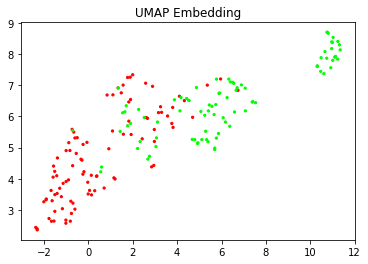

In [38]:
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 5, c=c, cmap='Spectral')
#plt.scatter(f_1_transform[:, 0], f_1_transform[:, 1], s= 5, c=c_1, cmap='Spectral')
plt.title("UMAP Embedding")

In [ ]:
print(features)

In [ ]:
print(test_features)